<a href="https://colab.research.google.com/github/aletbm/MySolutions_MLZoomcamp2024_DataTalks.Club/blob/main/02_Machine_Learning_for_Regression/2_Machine_Learning_for_Regression_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2nd week's homework - by [Alexander Daniel Rios](https://linktr.ee/aletbm)

In [31]:
!pip install mplcyberpunk

# Downloading the dataset

In [32]:
!kaggle datasets download -d juanmerinobermejo/laptops-price-dataset --force

Dataset URL: https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset
License(s): apache-2.0
  0% 0.00/48.7k [00:00<?, ?B/s]
100% 48.7k/48.7k [00:00<00:00, 47.1MB/s]


In [33]:
!unzip -o /content/laptops-price-dataset.zip

Archive:  /content/laptops-price-dataset.zip
  inflating: laptops.csv             


# Preparing the dataset

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import mplcyberpunk

plt.style.use("cyberpunk")

df = pd.read_csv("/content/laptops.csv")
df.head(5)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [35]:
print(f"The dataset contains {df.shape[0]} records and {df.shape[1]} features.")

The dataset contains 2160 records and 12 features.


In [36]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [37]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [38]:
string_col = df.select_dtypes('object').columns
df[string_col].head(5)

,laptop,status,brand,model,cpu,storage_type,gpu,touch
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,SSD,NaN,No
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,SSD,NaN,No
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,SSD,NaN,No
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,SSD,RTX 3050,No
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,SSD,NaN,No


In [39]:
df[string_col] = df[string_col].apply(lambda x: x.str.lower().replace(" ", ""))
df[string_col].head(5)

,laptop,status,brand,model,cpu,storage_type,gpu,touch
0,asus expertbook b1 b1502cba-ej0436x intel core...,new,asus,expertbook,intel core i5,ssd,NaN,no
1,alurin go start intel celeron n4020/8gb/256gb ...,new,alurin,go,intel celeron,ssd,NaN,no
2,asus expertbook b1 b1502cba-ej0424x intel core...,new,asus,expertbook,intel core i3,ssd,NaN,no
3,msi katana gf66 12uc-082xes intel core i7-1270...,new,msi,katana,intel core i7,ssd,rtx 3050,no
4,hp 15s-fq5085ns intel core i5-1235u/16gb/512gb...,new,hp,15s,intel core i5,ssd,NaN,no


# EDA

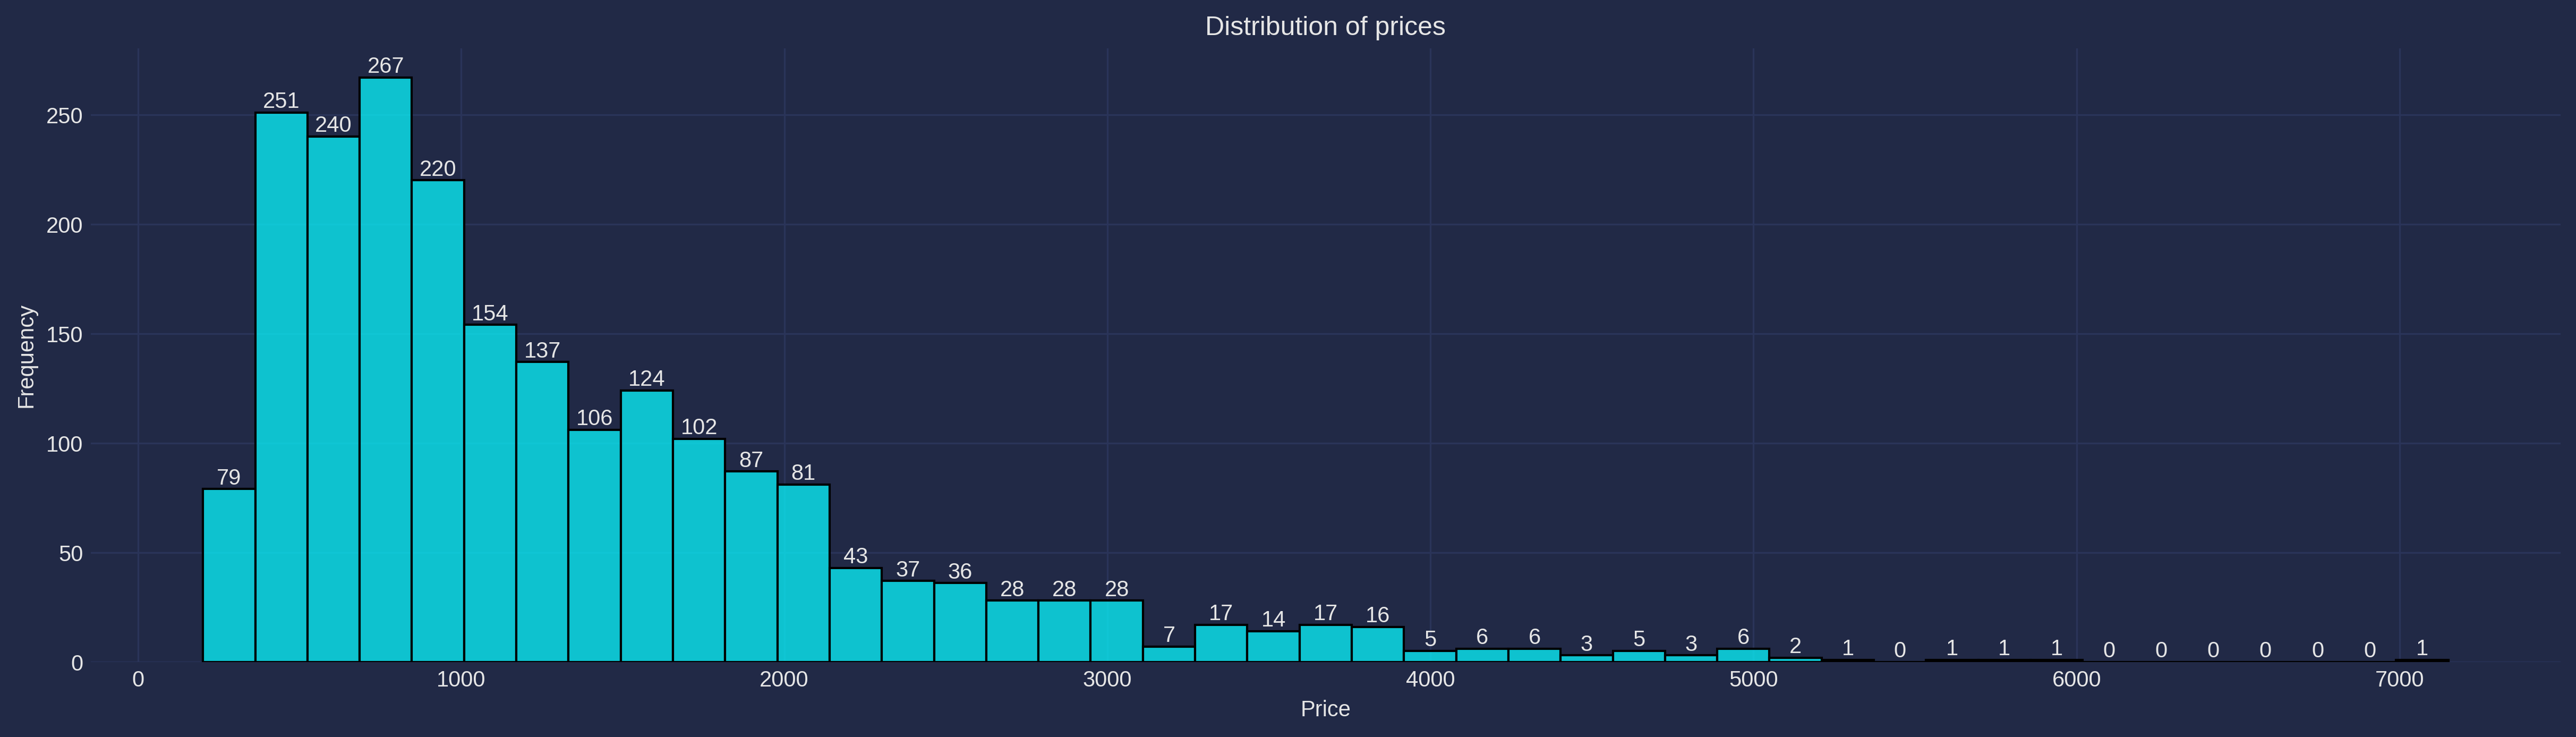

In [40]:
plt.figure(figsize=(20, 5), dpi=300)
y = sns.histplot(df.final_price)
y.bar_label(y.containers[0], labels=y.containers[0].datavalues)
plt.title("Distribution of prices")
plt.xlabel("Price")
plt.ylabel("Frequency");

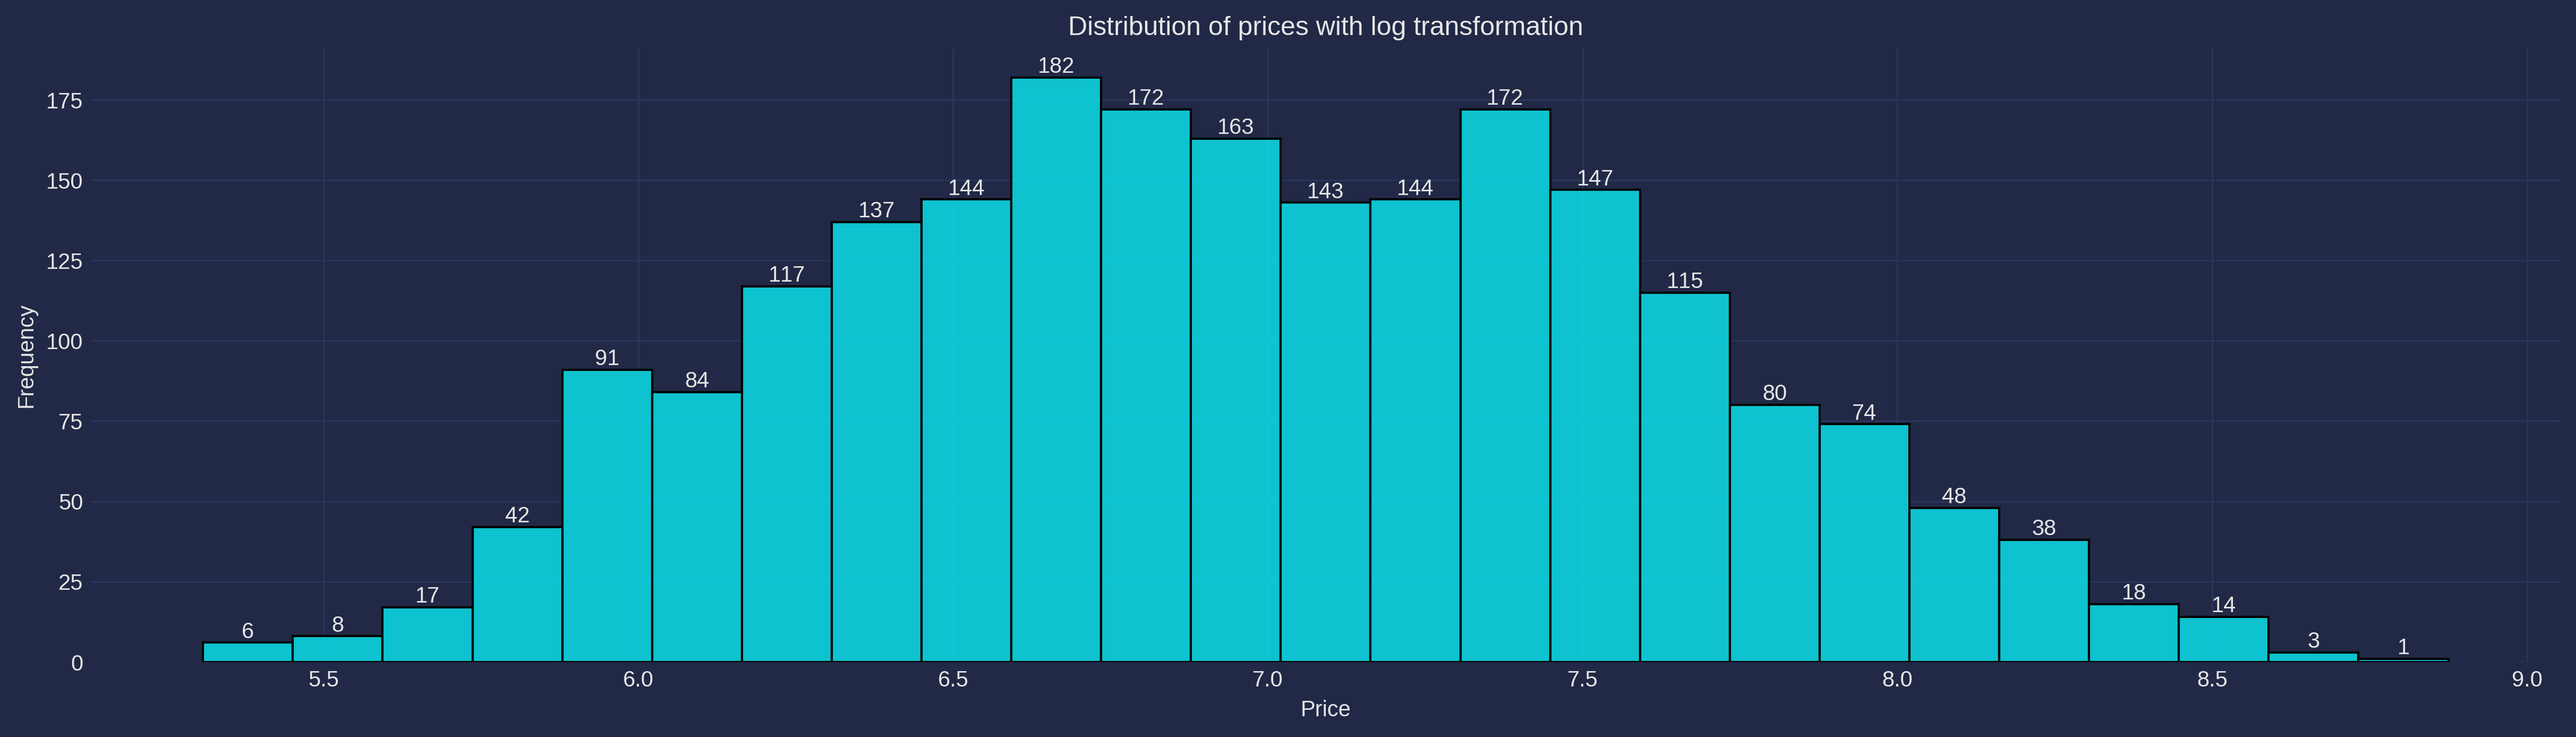

In [41]:
df["final_price_log"] = np.log1p(df.final_price)

plt.figure(figsize=(20, 5), dpi=300)
y = sns.histplot(df.final_price_log)
y.bar_label(y.containers[0], labels=y.containers[0].datavalues)
plt.title("Distribution of prices with log transformation")
plt.xlabel("Price")
plt.ylabel("Frequency");

In [42]:
df.isna().sum()

,0
laptop,0
status,0
brand,0
model,0
cpu,0
ram,0
storage,0
storage_type,42
gpu,1371
screen,4


# Feature Selection

In [43]:
df_reduced = df[['ram', 'storage', 'screen', 'final_price']]
df_reduced.head(5)

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


# Question 1
There's one column with missing values. What is it?

In [44]:
df_reduced.isna().sum()

,0
ram,0
storage,0
screen,4
final_price,0


# Question 2
What's the median (50% percentile) for variable 'ram'?

In [45]:
df_reduced['ram'].quantile(0.5)
#or
df_reduced['ram'].median()

16.0

# Splitting the dataset

In [46]:
def split_dataset(df, seed=42):
    np.random.seed(seed) # Setting for reproducibility

    n = len(df)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx].copy()

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    return df_train, df_val, df_test

n = len(df_reduced)
df_train, df_val, df_test = split_dataset(df_reduced)

print(f"""The training set represent {len(df_train)*100/n}%.
The validation set represent {len(df_val)*100/n}%.
The testing set represent {len(df_test)*100/n}%.""")

The training set represent 60.0%.
The validation set represent 20.0%.
The testing set represent 20.0%.


# Question 3
+ We need to deal with missing values for the column from Q1.
+ We have two options: fill it with 0 or with the mean of this variable.
+ Try both options. For each, train a linear regression model without regularization using the code from the lessons.
+ For computing the mean, use the training only!
+ Use the validation dataset to evaluate the models and compare the RMSE of each option.
+ Round the RMSE scores to 2 decimal digits using `round(score, 2)`

Which option gives better RMSE?

## Filling the missing values

In [47]:
def fill_na(df_train, df_val, df_test, value=None):
    df_train = df_train.fillna(value)
    df_val = df_val.fillna(value)
    df_test = df_test.fillna(value)
    return df_train, df_val, df_test

df_train, df_val, df_test = fill_na(df_train, df_val, df_test, value=df_train.screen.mean())

## Extracting X and y matrix

In [48]:
def extract_X_y(df_train, df_val, df_test, target='final_price'):
    X_train = df_train.drop([target], axis=1).values
    y_train = df_train[target].values

    X_val = df_val.drop([target], axis=1).values
    y_val = df_val[target].values

    X_test = df_test.drop([target], axis=1).values
    y_test = df_test[target].values

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = extract_X_y(df_train, df_val, df_test, target='final_price')

## Linear Regression

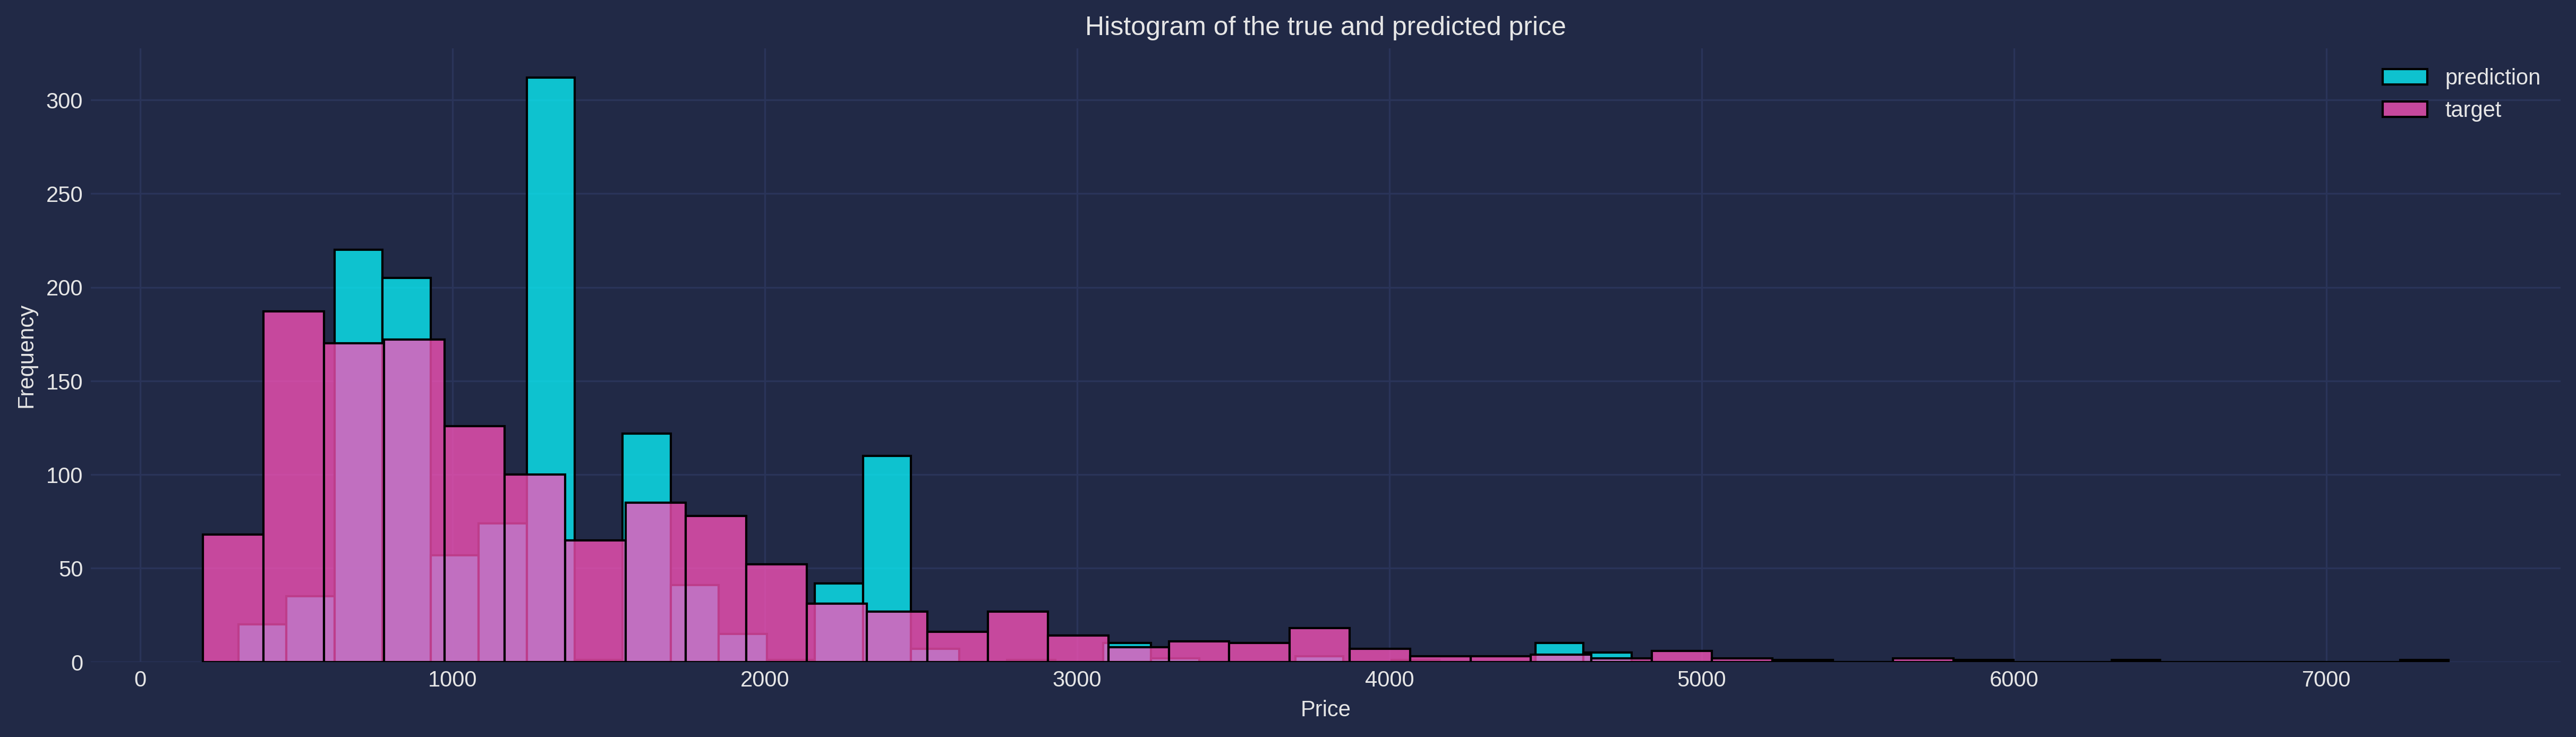

In [49]:
def linear_regression(X, w):
    return w[0] + X.dot(w[1:])

def calculate_weigths(X, y):
   ones = np.ones(X.shape[0])
   X = np.column_stack([ones, X])

   C = X.T.dot(X)
   C_inv = np.linalg.inv(C)
   w = C_inv.dot(X.T).dot(y)

   return w

class LinearRegressor():
    def __init__(self):
        self.w = 0

    def fit(self, X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        C = X.T.dot(X)
        C_inv = np.linalg.inv(C)
        self.w = C_inv.dot(X.T).dot(y)
        return

    def predict(self, X):
        return self.w[0] + X.dot(self.w[1:])

lr = LinearRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

plt.figure(figsize=(20, 5), dpi=300)
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of the true and predicted price")
plt.legend();

In [50]:
def RMSE(y, y_pred):
    error = y_pred - y
    mse = (error**2).mean()
    return np.sqrt(mse)

y_pred = lr.predict(X_val)
rmse_fillna_mean = round(RMSE(y_val, y_pred), 2)
rmse_fillna_mean

600.27

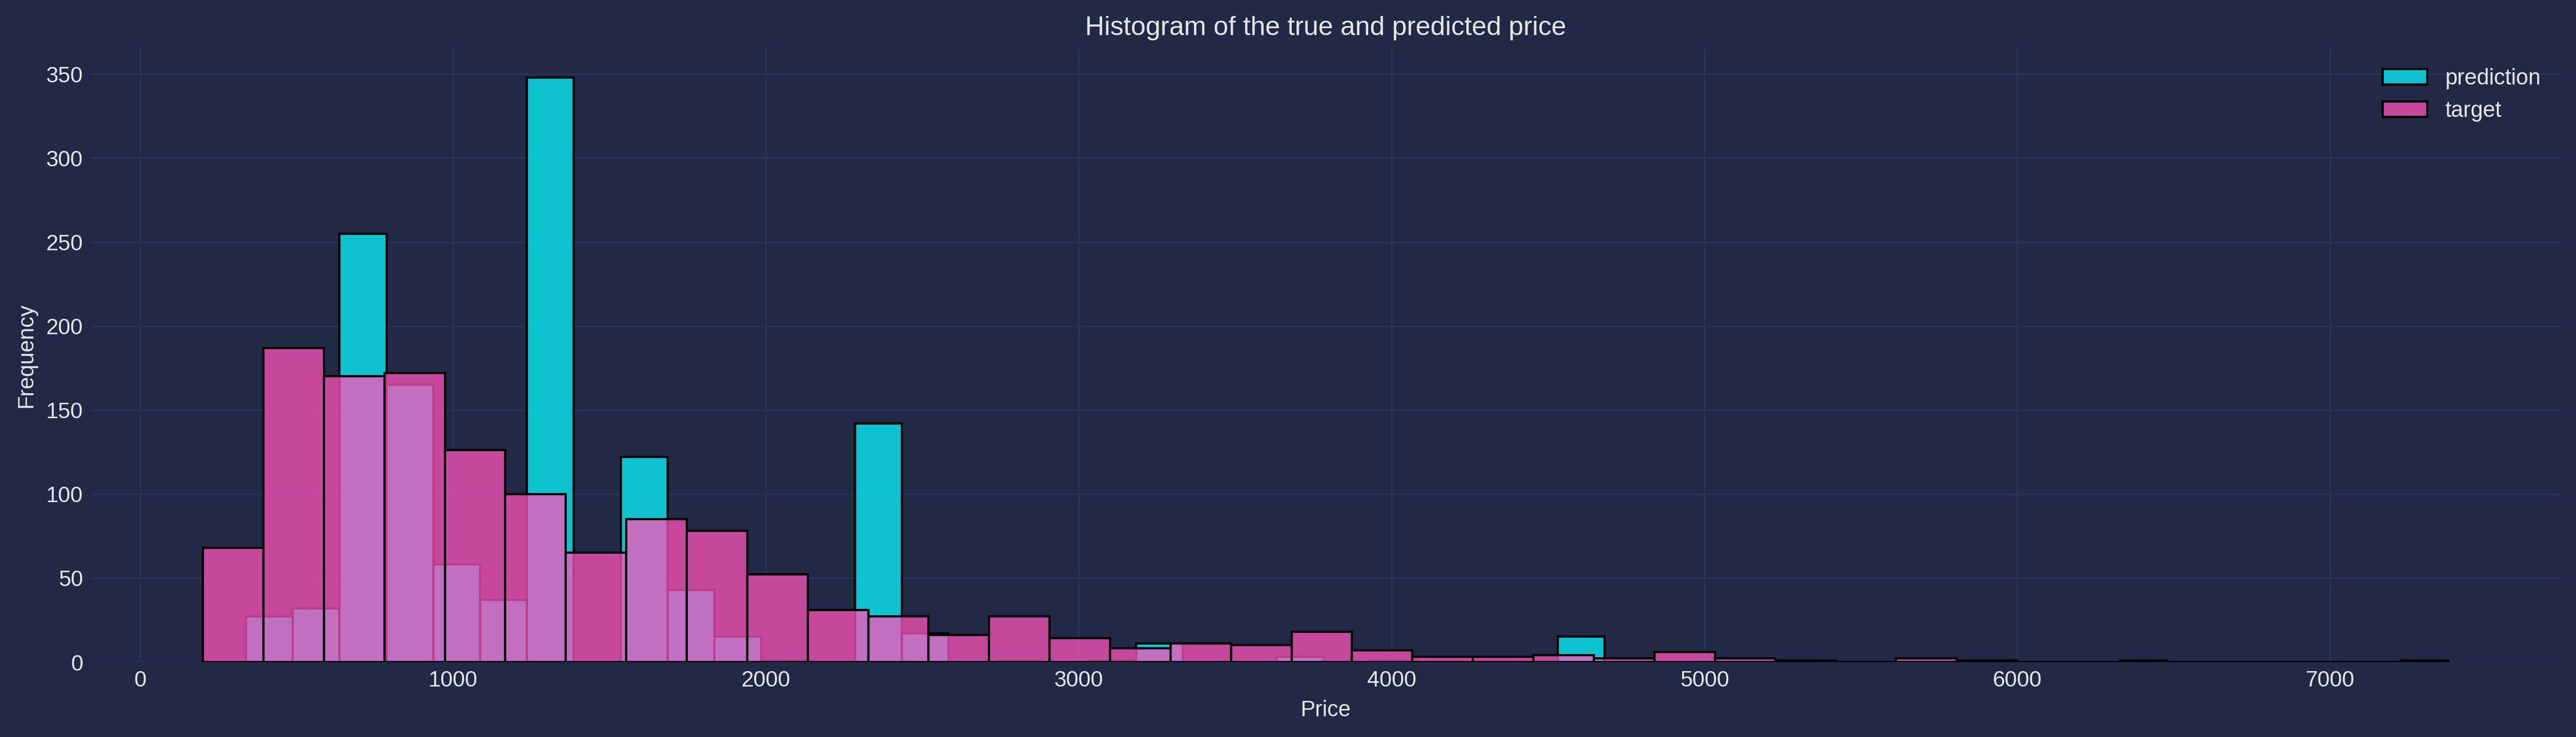

In [51]:
df_train, df_val, df_test = split_dataset(df_reduced)
df_train, df_val, df_test = fill_na(df_train, df_val, df_test, value=0)
X_train, y_train, X_val, y_val, X_test, y_test = extract_X_y(df_train, df_val, df_test, target='final_price')

lr = LinearRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

plt.figure(figsize=(20, 5), dpi=300)
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of the true and predicted price")
plt.legend();

In [52]:
y_pred = lr.predict(X_val)
rmse_fillna_zero = round(RMSE(y_val, y_pred), 2)
rmse_fillna_zero

597.36

In [53]:
print(f"RMSE with NA values filled with zero is {rmse_fillna_zero}.\nRMSE with NA values filled with the mean is {rmse_fillna_mean}.")

RMSE with NA values filled with zero is 597.36.
RMSE with NA values filled with the mean is 600.27.


# Regularization

In [54]:
def calculate_weigths(X, y, r=0.0):
   ones = np.ones(X.shape[0])
   X = np.column_stack([ones, X])

   C = X.T.dot(X)
   reg = r * np.eye(C.shape[0])
   C_inv = np.linalg.inv(C + reg)
   w = C_inv.dot(X.T).dot(y)

   return w

class LinearRegressor():
    def __init__(self, r=0):
        self.w = 0
        self.r = r

    def fit(self, X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        C = X.T.dot(X)
        reg = self.r * np.eye(C.shape[0])
        C_inv = np.linalg.inv(C + reg)
        self.w = C_inv.dot(X.T).dot(y)
        return

    def predict(self, X):
        return self.w[0] + X.dot(self.w[1:])

# Question 4
+ Now let's train a regularized linear regression.
+ For this question, fill the NAs with 0.
+ Try different values of r from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
+ Use RMSE to evaluate the model on the validation dataset.
+ Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [55]:
r = [0, 0.01, 0.1, 1, 10, 100]
for ri in r:
    lr = LinearRegressor(r=ri)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    print(f"For r={ri} -> RMSE={round(RMSE(y_val, y_pred), 2)}")

For r=0 -> RMSE=597.36
For r=0.01 -> RMSE=597.36
For r=0.1 -> RMSE=597.35
For r=1 -> RMSE=597.21
For r=10 -> RMSE=597.06
For r=100 -> RMSE=597.9


# Showing the regularization of RMSE

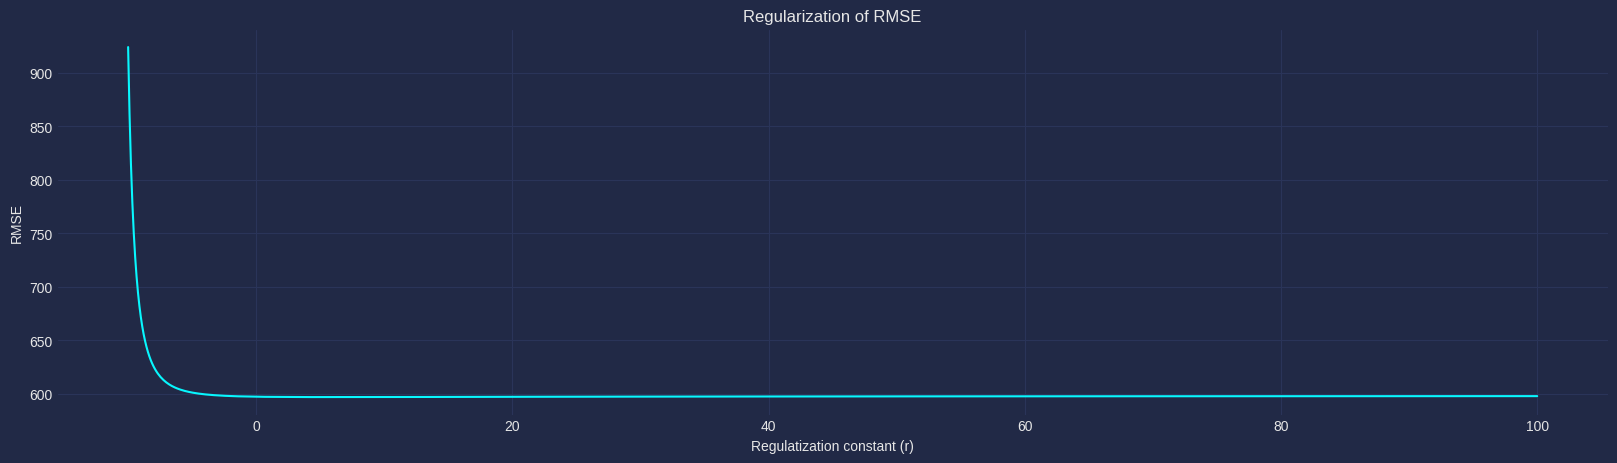

In [56]:
r = np.linspace(-10, 100, 1000)
rmse = []
for ri in r:
    lr = LinearRegressor(r=ri)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)

    rmse.append(round(RMSE(y_val, y_pred), 2))

plt.figure(figsize=(20, 5))
sns.lineplot(x=r, y=rmse)
plt.xlabel('Regulatization constant (r)')
plt.ylabel('RMSE')
plt.title('Regularization of RMSE');

## The histogram for the optimal regularization value

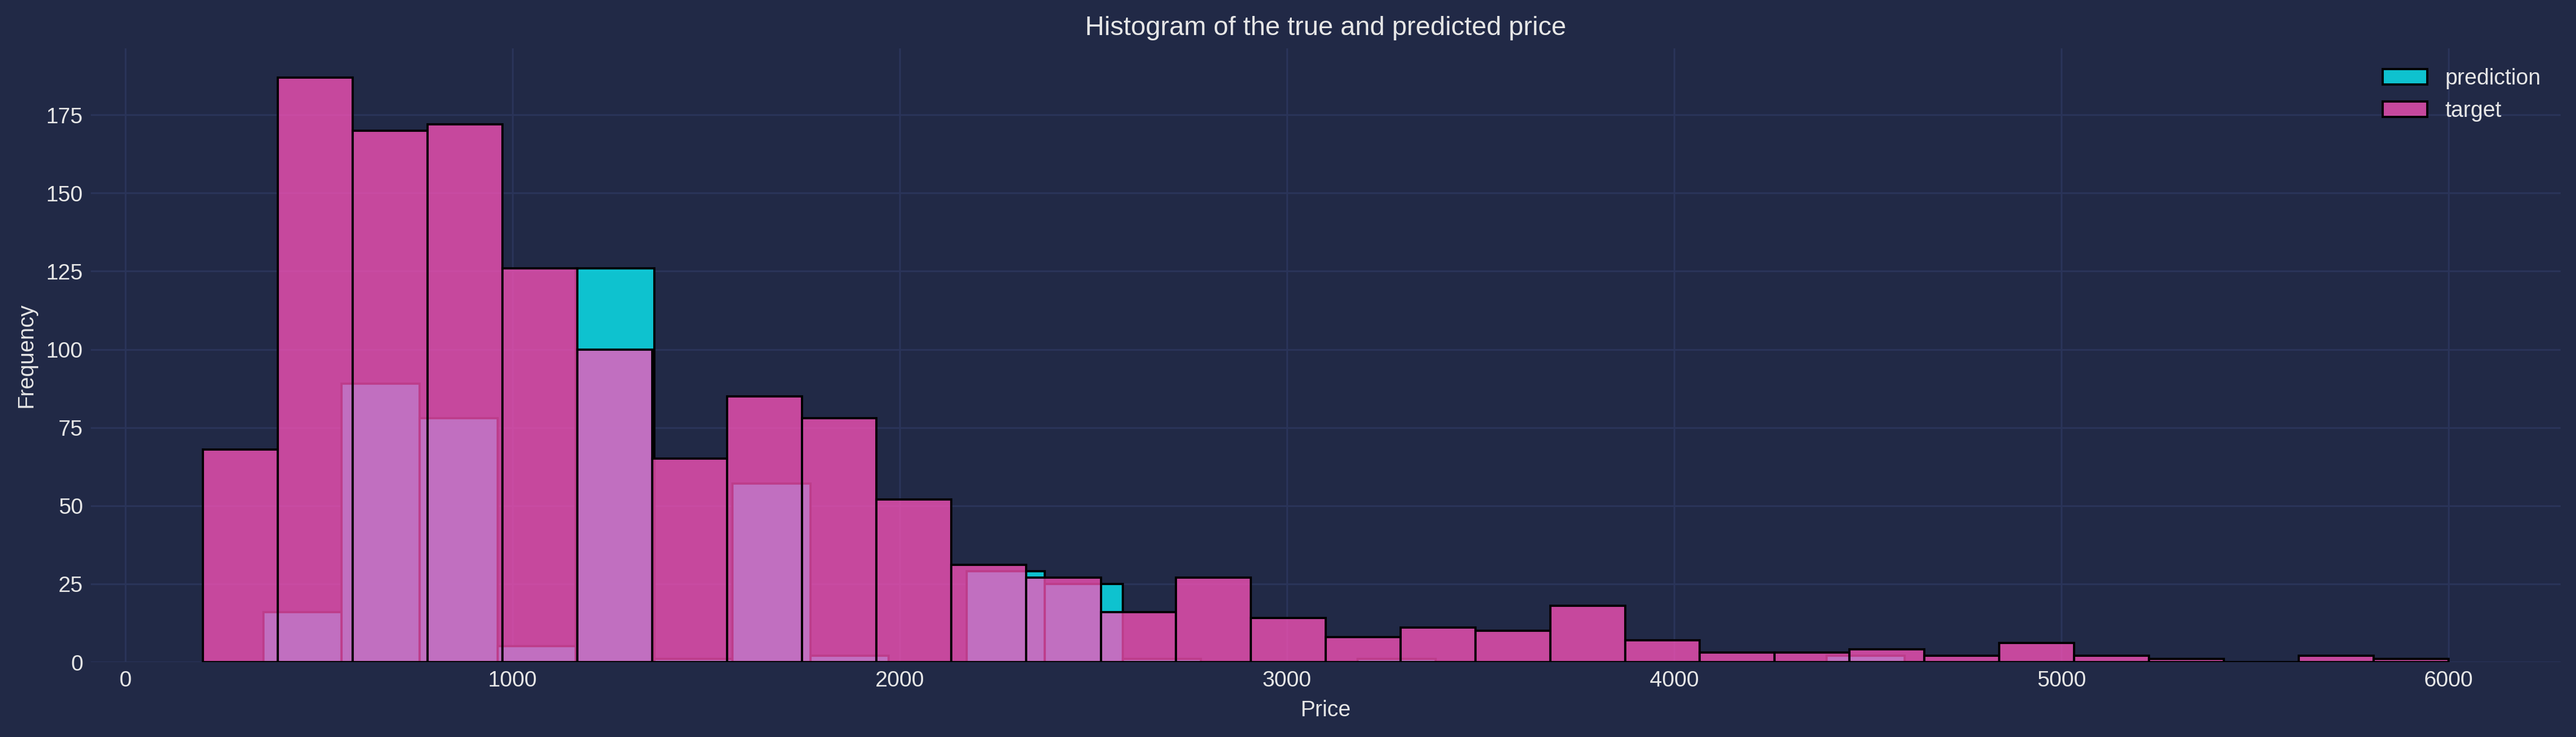

In [57]:
lr = LinearRegressor(r=10)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
rmse.append(round(RMSE(y_val, y_pred), 2))

plt.figure(figsize=(20, 5), dpi=300)
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of the true and predicted price")
plt.legend();

In [58]:
y_pred = lr.predict(X_val)
rmse_fillna_zero = round(RMSE(y_val, y_pred), 2)
rmse_fillna_zero

597.06

#Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
+ Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
+ For each seed, do the train/validation/test split with 60%/20%/20% distribution.
+ Fill the missing values with 0 and train a model without regularization.
+ For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
+ What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
+ Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.



In [59]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse = []

for seed_i in seed:
    df_train, df_val, df_test = split_dataset(df_reduced, seed_i)
    df_train, df_val, df_test = fill_na(df_train, df_val, df_test, value=0)
    X_train, y_train, X_val, y_val, X_test, y_test = extract_X_y(df_train, df_val, df_test, target='final_price')

    lr = LinearRegressor()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    rmse.append(RMSE(y_val, y_pred))

round(np.std(rmse), 3)

29.176

# Question 6
+ Split the dataset like previously, use seed 9.
+ Combine train and validation datasets.
+ Fill the missing values with 0 and train a model with `r=0.001`.

What's the RMSE on the test dataset?

In [60]:
df_train, df_val, df_test = split_dataset(df_reduced, seed=9)
df_train = pd.concat([df_train, df_val])
df_train, df_val, df_test = fill_na(df_train, df_val, df_test, value=0)
X_train, y_train, X_val, y_val, X_test, y_test = extract_X_y(df_train, df_val, df_test, target='final_price')

lr = LinearRegressor(r=0.001)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
round(RMSE(y_test, y_pred), 2)

608.61